# Fake News Detection

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('news.csv')

# Knowing the Dataset

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.shape

(6335, 4)

In [5]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [9]:
df.describe()

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


In [10]:
df.dtypes

title    object
text     object
label    object
dtype: object

In [11]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

<AxesSubplot:>

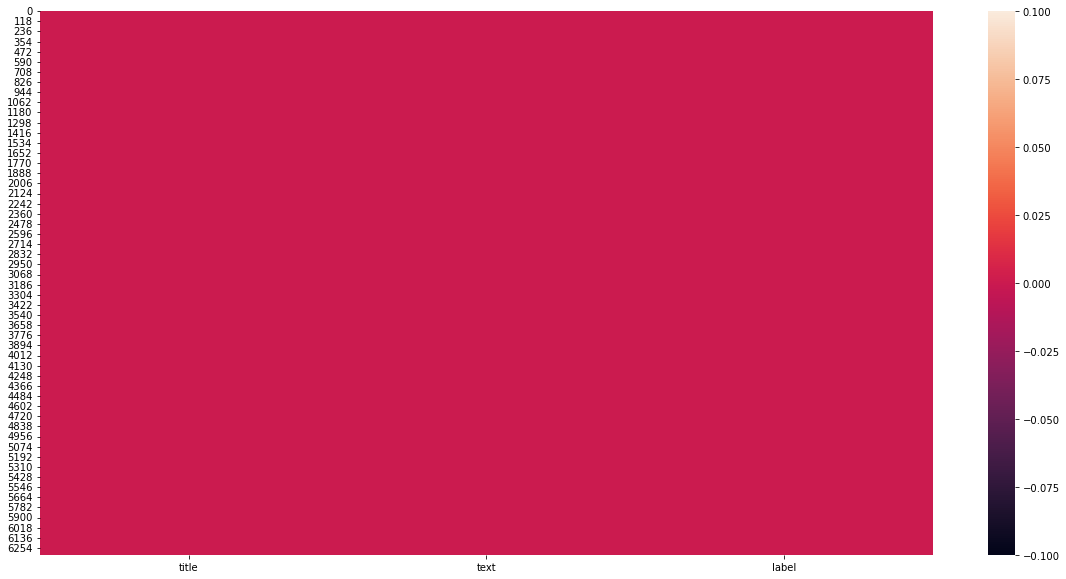

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

In [13]:
sns.set_style('whitegrid')

In [14]:
for i in df:
    print(i,df[i].nunique())

title 6256
text 6060
label 2


In [15]:
df.duplicated().sum()

29

In [16]:
#plt.figure(figsize=(20,10))
#sns.countplot(x='title',data=df,hue='label')

In [17]:
df['label'].value_counts(normalize=True)

REAL    0.500552
FAKE    0.499448
Name: label, dtype: float64

In [18]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yasha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yasha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
import re
from nltk.corpus import stopwords as sw
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
wd=WordNetLemmatizer()
corpus=[]
for i in range(0,len(df)):
    title = re.sub('[^a-zA-Z]',' ',df['title'][i])
    title = title.lower()
    title = title.split()
    
    title = [wd.lemmatize(word) for word in title if not word in sw.words('English')]
    title = ' '.join(title)
    corpus.append(title)

In [25]:
corpus

['smell hillary fear',
 'watch exact moment paul ryan committed political suicide trump rally video',
 'kerry go paris gesture sympathy',
 'bernie supporter twitter erupt anger dnc tried warn',
 'battle new york primary matter',
 'tehran usa',
 'girl horrified watch boyfriend left facetime',
 'britain schindler dy',
 'fact check trump clinton commander chief forum',
 'iran reportedly make new push uranium concession nuclear talk',
 'three clinton iowa glimpse fire eluded hillary clinton campaign',
 'donald trump shockingly weak delegate game somehow got even worse',
 'strong solar storm tech risk today news oct video',
 'way america preparing world war',
 'trump take cruz lightly',
 'woman lead differently',
 'shocking michele obama hillary caught glamorizing date rape promoter',
 'hillary clinton huge trouble america noticed sick thing hidden picture liberty writer news',
 'iran bill obama like',
 'chart explains everything need know partisanship america',
 'slippery slope trump propo

In [26]:
len(corpus)

6335